In [1]:
from lightgbm import LGBMClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import lightgbm as lgb

In [2]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [3]:
enc = OrdinalEncoder()

# y*.shape = (num_sample, )
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1)).reshape(-1, )
y_test_enc = enc.transform(y_test.reshape(-1, 1)).reshape(-1, )
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1)).reshape(-1, )
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025,)


In [4]:
# 不需要指定num_class参数
model = LGBMClassifier(
    boosting_type='gbdt',  # 对应boosting
    objective='multiclass',
    n_jobs=-1,
    max_depth=-1,
    min_child_weight=1e-3,
    min_child_samples=20,
    num_leaves=31,
    subsample=1.0,
    subsample_freq=0,
    learning_rate=0.1,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    n_estimators=100)

In [5]:
model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_va, y_va_enc)],  # 对应valid_sets
          sample_weight=1 / (1 + y_train_enc),  # 对应Dataset(weight)
          eval_metric='multiclass',  # 对应metric+feval
          callbacks=[lgb.early_stopping(100),
                     lgb.log_evaluation(10)],
          categorical_feature=[0, 1]  # 对应Dataset(categorical_feature)
          )

Training until validation scores don't improve for 100 rounds
[10]	training's multi_logloss: 0.522597	valid_1's multi_logloss: 0.766876
[20]	training's multi_logloss: 0.296985	valid_1's multi_logloss: 0.591236
[30]	training's multi_logloss: 0.175756	valid_1's multi_logloss: 0.535998


C:\Users\dcdmm\anaconda3\envs\pytorch_env\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\dcdmm\anaconda3\envs\pytorch_env\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\dcdmm\anaconda3\envs\pytorch_env\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\dcdmm\anaconda3\envs\pytorch_env\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[40]	training's multi_logloss: 0.10905	valid_1's multi_logloss: 0.523702
[50]	training's multi_logloss: 0.0691094	valid_1's multi_logloss: 0.529394
[60]	training's multi_logloss: 0.0448136	valid_1's multi_logloss: 0.544612
[70]	training's multi_logloss: 0.0298479	valid_1's multi_logloss: 0.560853
[80]	training's multi_logloss: 0.0200756	valid_1's multi_logloss: 0.580376
[90]	training's multi_logloss: 0.0137856	valid_1's multi_logloss: 0.604085
[100]	training's multi_logloss: 0.00959176	valid_1's multi_logloss: 0.6294
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.00959176	valid_1's multi_logloss: 0.6294


LGBMClassifier(objective='multiclass')

In [6]:
# 预测结果(num_sample, )
model.predict(X_test)

array([4., 1., 0., 4., 5., 0., 4., 1., 4., 1., 1., 4., 1., 4., 5., 1., 5.,
       3., 1., 0., 0., 4., 4., 1., 0., 2., 1., 4., 1., 5., 1., 0., 0., 0.,
       4., 4., 1., 1., 6., 1., 0., 0., 4., 4., 6., 4., 1., 4., 2., 6., 1.,
       1., 4., 4., 2., 1., 1., 1., 1., 0., 0., 1., 5., 0., 1., 4., 4., 4.,
       4., 4., 4., 1., 0., 3., 1., 5., 0., 2., 4., 1., 4., 0., 4., 1., 2.,
       4., 5., 4., 0., 2., 5., 1., 1., 0., 0., 5., 5., 4., 2., 0., 0., 4.,
       1., 1., 6., 5., 1., 1., 1., 2., 0., 5., 1., 1., 1., 1., 6., 5., 4.,
       0., 1., 2., 4., 1., 1., 0., 5., 0., 2., 0., 5., 2., 0., 1., 1., 3.,
       0., 2., 4., 3., 1., 4., 1., 5., 5., 1., 0., 4., 5., 4., 1., 2., 4.,
       1., 1., 3., 4., 6., 4., 4., 5., 4., 3., 1., 5., 1., 4., 5., 3., 6.,
       4., 2., 4., 1., 3., 1., 0., 1., 1., 2., 1., 1., 1., 0., 0., 4., 1.,
       0., 1., 5., 0., 4., 1., 2., 1., 4., 1., 1., 5., 5., 5., 4., 5., 1.,
       4., 1., 1., 1., 1., 4., 2., 4., 0., 1., 0., 4., 1., 0., 5., 5., 5.,
       1., 2., 4., 0., 5.

In [7]:
# 预测结果的概率矩阵
model.predict_proba(X_test)

array([[4.14927748e-06, 4.43774292e-03, 1.01616225e-07, ...,
        9.95557770e-01, 8.07497228e-08, 1.16886862e-07],
       [6.51950734e-02, 9.34353032e-01, 9.58009870e-06, ...,
        4.26366977e-04, 8.15143885e-06, 2.99806518e-06],
       [5.92898633e-01, 4.04594422e-01, 1.24625964e-05, ...,
        2.47318147e-03, 1.22934650e-05, 3.84130186e-06],
       ...,
       [1.62109872e-06, 3.87569839e-04, 5.26797214e-08, ...,
        9.99610554e-01, 1.06219211e-07, 7.67733129e-08],
       [2.77917122e-01, 7.02543744e-01, 3.50828004e-05, ...,
        1.94346277e-02, 2.54309786e-05, 3.29547972e-05],
       [9.05159922e-02, 9.08398312e-01, 8.03966466e-06, ...,
        1.04597793e-03, 2.25864043e-05, 6.05091471e-06]])

In [8]:
# 准确率
model.score(X_test, y_test)

0.06

In [9]:
# 对应vals_result
model.evals_result_

{'training': OrderedDict([('multi_logloss',
               [1.1315226280296171,
                0.9927756820625842,
                0.8940026673228498,
                0.8124605859988843,
                0.7474418578930141,
                0.6889830818514594,
                0.6415968835663082,
                0.5985976412004992,
                0.5587385270250396,
                0.5225971906959396,
                0.4917016074511313,
                0.4618650250609005,
                0.4351256039664484,
                0.4111956589324083,
                0.3892989975119147,
                0.36657013380182907,
                0.3479109639717855,
                0.33025219988401444,
                0.3119099052127416,
                0.2969850134980745,
                0.28098774879750604,
                0.2665361120826025,
                0.25278730914053416,
                0.23957678038442873,
                0.22712073575646904,
                0.21557661965426703,
             

In [10]:
# 特征相对重要性
model.feature_importances_

array([  91,  167, 1320, 2114, 1830, 3855, 1892, 1827, 1641, 3391,  168,
          0,   73,  271,  119,   20,    0,    0,   33,    0,    0,    0,
          0,  116,    0,  237,   42,    0,    0,    0,   39,   19,    0,
        159,    0,  145,   97,   25,    0,    0,    0,    0,  182,  186,
          4,   33,   27,    0,    0,    0,    0,  148,  191,    0])

In [11]:
# The underlying Booster of this model.
model.booster_

In [12]:
# 保存训练好的模型
model.booster_.save_model("lgb1.model")

In [13]:
import lightgbm as lgb

# 加载训练好的模型
bst = lgb.Booster(model_file='lgb1.model')
bst

In [14]:
bst.predict(X_test) - model.predict_proba(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

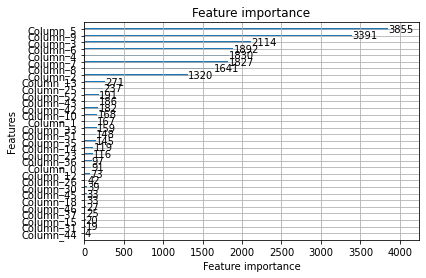

In [15]:
import matplotlib.pyplot as plt

# 绘制特征的相对重要性
lgb.plot_importance(model)
plt.show()

In [16]:
# 可视化lgb分割过程
img = lgb.create_tree_digraph(model)

In [17]:
type(img)

graphviz.graphs.Digraph

In [19]:
df = model.booster_.trees_to_dataframe()
df.head()

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S4,0-S1,None,Column_5,200.309006,1903.5,<=,left,None,-0.902339,0.000000,2025
1,0,2,0-S4,0-S20,0-S5,0-S0,Column_5,10.091700,1026.5,<=,left,None,-1.016170,95.469200,1131
2,0,3,0-S20,0-L0,0-L21,0-S4,Column_25,2.757360,0.0,<=,left,None,-1.041500,59.414500,788
3,0,4,0-L0,None,None,0-S20,None,NaN,None,None,None,None,-1.046547,56.320513,769
4,0,4,0-L21,None,None,0-S20,None,NaN,None,None,None,None,-0.949586,3.094018,19


In [20]:
# 决策路径
df[df['tree_index'] == 0]

,tree_index,node_depth,node_index,left_child,right_child,parent_index,split_feature,split_gain,threshold,decision_type,missing_direction,missing_type,value,weight,count
0,0,1,0-S0,0-S4,0-S1,None,Column_5,200.309006,1903.5,<=,left,None,-0.902339,0.000000,2025
1,0,2,0-S4,0-S20,0-S5,0-S0,Column_5,10.091700,1026.5,<=,left,None,-1.016170,95.469200,1131
2,0,3,0-S20,0-L0,0-L21,0-S4,Column_25,2.757360,0.0,<=,left,None,-1.041500,59.414500,788
3,0,4,0-L0,None,None,0-S20,None,NaN,None,None,None,None,-1.046547,56.320513,769
4,0,4,0-L21,None,None,0-S20,None,NaN,None,None,None,None,-0.949586,3.094018,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,6,0-L8,None,None,0-S23,None,NaN,None,None,None,None,-0.922114,3.214565,26
57,0,6,0-L24,None,None,0-S23,None,NaN,None,None,None,None,-1.046547,3.094018,22
58,0,3,0-S24,0-L2,0-L25,0-S1,Column_4,2.314940,46.5,<=,left,None,-0.969445,11.672900,74
59,0,4,0-L2,None,None,0-S24,None,NaN,None,None,None,None,-1.004721,7.172497,48
